# This notebook will serve for the initial EDA for the ratings data for the TFW project

In [1]:
# Import necassary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

ROOT = os.environ.get('PWD')

In [2]:
# read in the dataset

df_rating = pd.read_csv('../data/rating_20210707.csv')

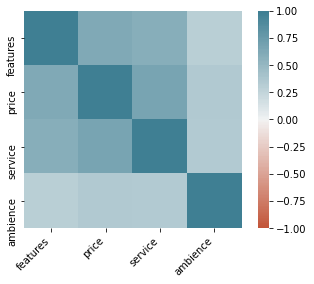

In [3]:
# generate the heatmap

corr = df_rating.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [38]:
corr.style.background_gradient(cmap='coolwarm')

,features,price,service,ambience
features,1.000000,0.618268,0.581604,0.298260
price,0.618268,1.000000,0.671694,0.359136
service,0.581604,0.671694,1.000000,0.351328
ambience,0.298260,0.359136,0.351328,1.000000


# there are high correlations for many of these variables, but in this case, this should not be surprising

In [4]:
df_rating.head()


,rating_date,listing_id,features,price,service,ambience,date_from,date_to
0,2012-09-16,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2012-09-09,2012-09-15
1,2012-10-20,fbd74bce-23dd-53e7-b988-8beb85160d6f,4,5,5,5,2012-10-06,2012-10-13
2,2014-06-17,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2013-08-31,2013-09-07
3,2014-10-15,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,4,2014-10-09,2014-10-12
4,2015-08-19,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,5,2015-08-10,2015-08-17


In [5]:
# convert rating_date, date_from and data_to to datetime 

df_rating['rating_date'] = pd.to_datetime(df_rating['rating_date'])


In [7]:
df_rating.head()


,rating_date,listing_id,features,price,service,ambience,date_from,date_to
0,2012-09-16,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2012-09-09,2012-09-15
1,2012-10-20,fbd74bce-23dd-53e7-b988-8beb85160d6f,4,5,5,5,2012-10-06,2012-10-13
2,2014-06-17,fbd74bce-23dd-53e7-b988-8beb85160d6f,5,5,5,5,2013-08-31,2013-09-07
3,2014-10-15,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,4,2014-10-09,2014-10-12
4,2015-08-19,b766fc7c-6d44-5c86-b6d1-3f699c78b3a6,4,5,5,5,2015-08-10,2015-08-17


In [6]:
print (df_rating.dtypes)

rating_date    datetime64[ns]
listing_id             object
features                int64
price                   int64
service                 int64
ambience                int64
date_from              object
date_to                object
dtype: object


In [7]:
df_rating['date_to'] = pd.to_datetime(df_rating['date_to'], errors = 'coerce')

In [8]:
df_rating['date_from'] = pd.to_datetime(df_rating['date_from'], errors = 'coerce')

# introduce a variable to indicate whether a property has a rating, this will be 0 for those properties we add in later

In [36]:
df_rating = df_rating.assign(rated=1)

In [23]:
# get the master list of all properties. read in listings dataset

df_listings = pd.read_csv('/Users/petermcisaac/neue-fische-traum/traum-preis/datasets/listings_20210707.csv')



In [30]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30269 entries, 0 to 30268
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      30269 non-null  object 
 1   customer_id                     30269 non-null  object 
 2   state                           30269 non-null  object 
 3   contract_end                    30269 non-null  object 
 4   zip                             30269 non-null  object 
 5   country_title                   30269 non-null  object 
 6   region                          30269 non-null  object 
 7   subregion                       30268 non-null  object 
 8   holiday_region                  30269 non-null  object 
 9   property_type                   30269 non-null  object 
 10  subscription                    30269 non-null  object 
 11  binding_inquiry                 30269 non-null  object 
 12  option_allergic                 

In [31]:
df_properties = df_listings['listing_id']

In [33]:
df_properties.tail()


30264    00779d9d-7264-5704-a71d-e6d1849cb4b7
30265    fd0c87bc-54f5-5281-90e8-93c3e4ac40b0
30266    9e99c378-45e5-5635-8644-e3f13cf6d101
30267    048f8764-c789-5003-9a67-a63d3d3f5062
30268    713131b6-8f3d-50c9-b0cb-0ba0f985e06a
Name: listing_id, dtype: object

In [37]:
df_rating_all_properties = pd.merge(df_properties, df_rating, on="listing_id", how='outer')

In [38]:
df_rating_all_properties.tail()

,listing_id,rating_date,features,price,service,ambience,date_from,date_to,rated
362762,481370a2-67c9-556f-975b-643f4bd1ee70,2021-02-02,5.0,5.0,5.0,5.0,2020-11-14,2021-01-14,1.0
362763,d6f52b59-e397-5143-acfe-18f3ebb6a749,2021-04-28,5.0,5.0,5.0,5.0,2020-07-03,2020-07-05,1.0
362764,ddbde441-5b1e-531c-8ea4-7af12954cba9,2021-04-04,5.0,5.0,5.0,5.0,2021-03-06,2021-03-13,1.0
362765,ddbde441-5b1e-531c-8ea4-7af12954cba9,2021-04-05,5.0,5.0,5.0,5.0,2020-10-09,2020-10-16,1.0
362766,ddbde441-5b1e-531c-8ea4-7af12954cba9,2021-06-20,5.0,5.0,5.0,5.0,2021-06-05,2021-06-19,1.0


In [52]:
df_rating_all_properties['rated'] = df_rating_all_properties['rated'].fillna(0)

In [53]:
df_rating_all_properties['rated'].unique()

array([1., 0.])